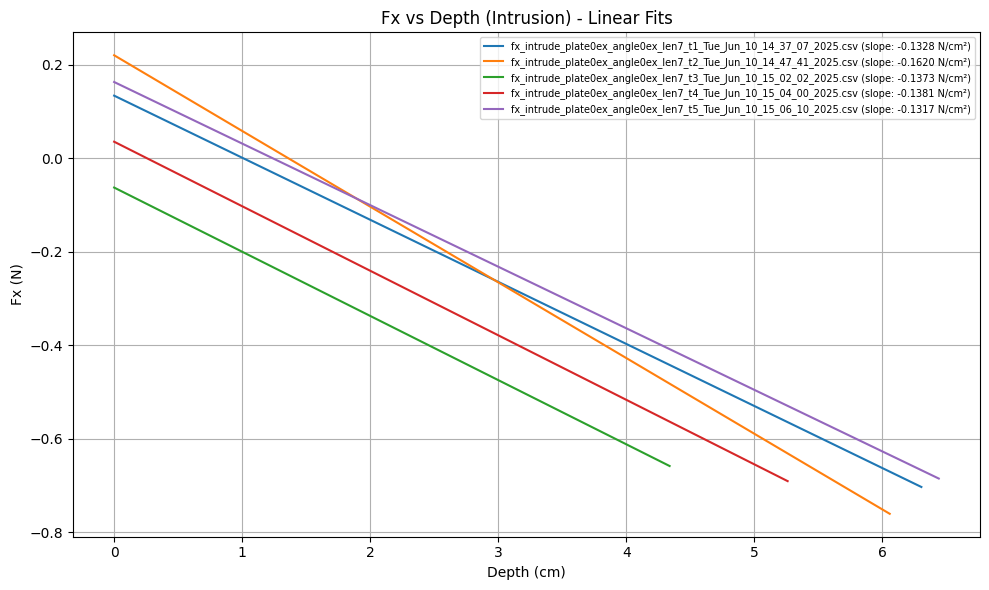


Mean Fx slope: -0.1404 N/cm²
Std dev     : 0.0111 N/cm²


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def process_and_plot_fx_slopes(folder_path):
    slopes = []
    plt.figure(figsize=(10, 6))

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(path)
                if 'depth' in df.columns and 'toeforce_x' in df.columns:
                    df_clean = df[df['depth'] >= 0]

                    slope, intercept, r_value, p_value, std_err = linregress(df_clean['depth'], df_clean['toeforce_x'])
                    slopes.append(slope)

                    # Regression line for plotting
                    fy_fit = slope * df_clean['depth'] + intercept
                    plt.plot(df_clean['depth'], fy_fit, label=f"{file} (slope: {slope:.4f} N/cm²)")
                else:
                    print(f"Skipping {file} — missing columns")
            except Exception as e:
                print(f"Error processing {file}: {e}")

    plt.title("Fx vs Depth (Intrusion) - Linear Fits")
    plt.xlabel("Depth (cm)")
    plt.ylabel("Fx (N)")
    plt.grid(True)
    if slopes:
        plt.legend(fontsize=7)
    plt.tight_layout()
    plt.show()

    if slopes:
        mean_slope = np.mean(slopes)
        std_slope = np.std(slopes)
        print(f"\nMean Fx slope: {mean_slope:.4f} N/cm²")
        print(f"Std dev     : {std_slope:.4f} N/cm²")
    else:
        print("No valid Fx files processed.")

folder_path = r"c:\Users\Tarunika P\Desktop\Summer '25 Intern\USC\LASSIE\LASSIE_DataForHeatMap\LASSIE_DataForHeatMap\cut files\fx_intrude_plate0ex_angle0"
process_and_plot_fx_slopes(folder_path)


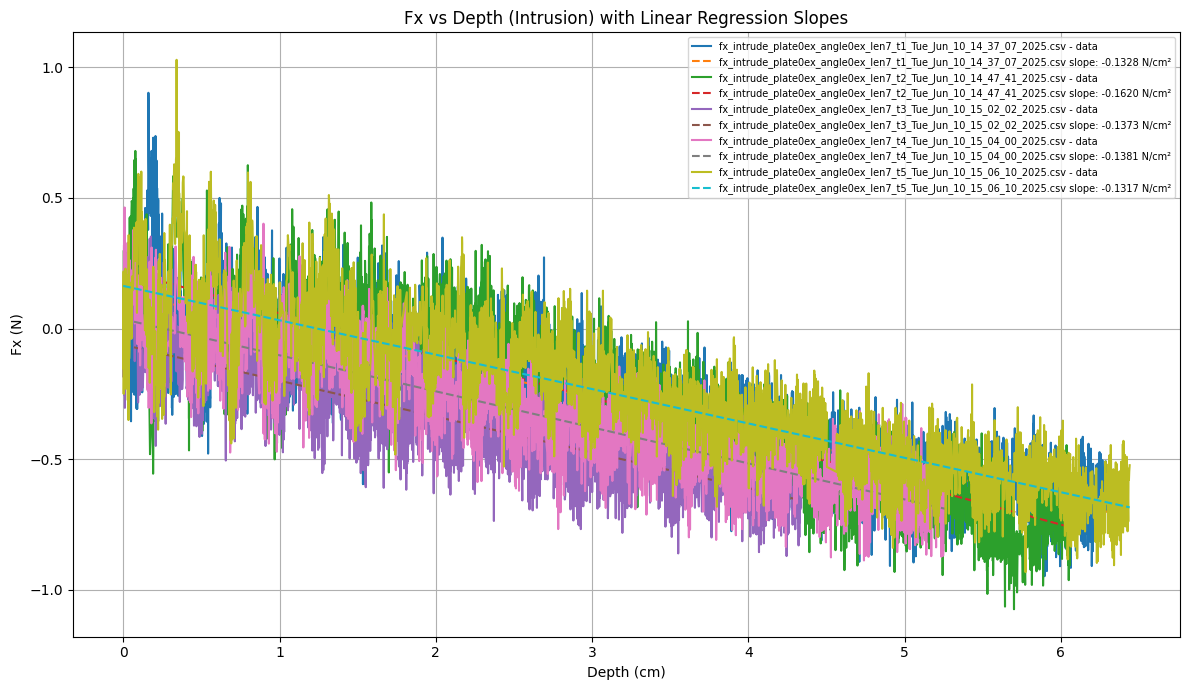


Mean Fx slope: -0.1404 N/cm²
Std dev     : 0.0111 N/cm²


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_fx_with_slopes(folder_path):
    slopes = []
    plt.figure(figsize=(12, 7))

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(path)
                if 'depth' in df.columns and 'toeforce_x' in df.columns:
                    df_clean = df[df['depth'] >= 0]

                    # Plot original data - solid line
                    plt.plot(df_clean['depth'], df_clean['toeforce_x'], label=f"{file} - data")

                    # Linear regression slope & intercept
                    slope, intercept, _, _, _ = linregress(df_clean['depth'], df_clean['toeforce_x'])
                    slopes.append(slope)

                    # Regression line - dotted
                    fit_line = slope * df_clean['depth'] + intercept
                    plt.plot(df_clean['depth'], fit_line, linestyle='--', label=f"{file} slope: {slope:.4f} N/cm²")

                else:
                    print(f"Skipping {file} — missing 'depth' or 'toeforce_x' columns")
            except Exception as e:
                print(f"Error processing {file}: {e}")

    plt.title("Fx vs Depth (Intrusion) with Linear Regression Slopes")
    plt.xlabel("Depth (cm)")
    plt.ylabel("Fx (N)")
    plt.grid(True)
    plt.legend(fontsize=7, loc='best')
    plt.tight_layout()
    plt.show()

    if slopes:
        mean_slope = np.mean(slopes)
        std_slope = np.std(slopes)
        print(f"\nMean Fx slope: {mean_slope:.4f} N/cm²")
        print(f"Std dev     : {std_slope:.4f} N/cm²")
    else:
        print("No valid Fx files processed.")

# === Run ===
folder_path = r"c:\Users\Tarunika P\Desktop\Summer '25 Intern\USC\LASSIE\LASSIE_DataForHeatMap\LASSIE_DataForHeatMap\cut files\fx_intrude_plate0ex_angle0"
plot_fx_with_slopes(folder_path)


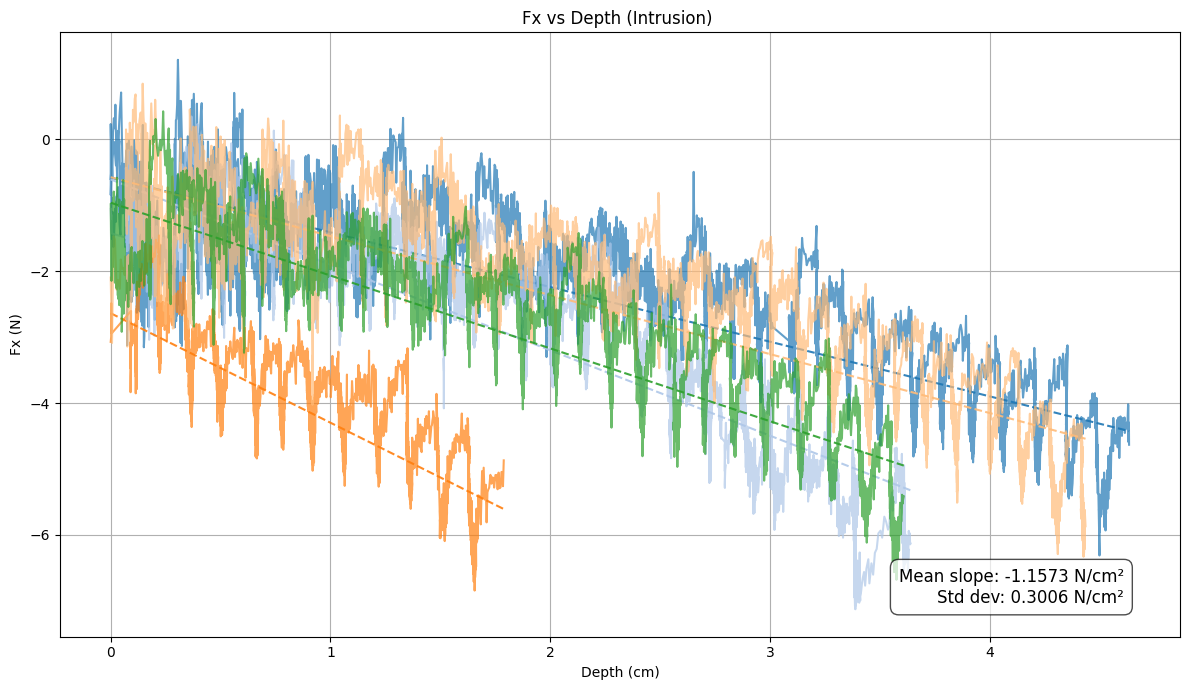

fx_intrude_plate2ex_angleNeg60ex_len10_t5_Fri_Jun_20_19_27_29_2025.csv: Slope = -1.1052 N/cm²


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import itertools

def plot_fx_with_colors(folder_path):
    slopes = []
    plt.figure(figsize=(12, 7))

    # Color cycle for lines
    color_cycle = itertools.cycle(plt.cm.tab20.colors)  # 20 distinct colors

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(path)
                if 'depth' in df.columns and 'toeforce_x' in df.columns:
                    df_clean = df[df['depth'] >= 0]
                    color = next(color_cycle)

                    # Original data - solid line with unique color
                    plt.plot(df_clean['depth'], df_clean['toeforce_x'], color=color, alpha=0.7)

                    # Linear regression
                    slope, intercept, _, _, _ = linregress(df_clean['depth'], df_clean['toeforce_x'])
                    slopes.append(slope)

                    # Regression line - dotted with same color
                    fit_line = slope * df_clean['depth'] + intercept
                    plt.plot(df_clean['depth'], fit_line, linestyle='--', color=color, alpha=0.9)

                else:
                    print(f"Skipping {file} — missing 'depth' or 'toeforce_x' columns")
            except Exception as e:
                print(f"Error processing {file}: {e}")

    plt.title("Fx vs Depth (Intrusion) ")
    plt.xlabel("Depth (cm)")
    plt.ylabel("Fx (N)")
    plt.grid(True)

    if slopes:
        mean_slope = np.mean(slopes)
        std_slope = np.std(slopes)
        textstr = f"Mean slope: {mean_slope:.4f} N/cm²\nStd dev: {std_slope:.4f} N/cm²"
        plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes,
                 fontsize=12, verticalalignment='bottom', horizontalalignment='right',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
    else:
        print("No valid Fx files processed.")

    plt.tight_layout()
    plt.show()
    print(f"{file}: Slope = {slope:.4f} N/cm²")
# === Run ===
folder_path = (r"C:\Users\Tarunika P\Desktop\Summer '25 Intern\USC\LASSIE\LASSIE_DataForHeatMap\LASSIE_DataForHeatMap\cut files\cutfiles_plate2ex_angleNeg60\fx_intrude_plate2ex_angleNeg60")
plot_fx_with_colors(folder_path)
